### Contents:
- [Loading of Libraries](#Loading-of-Libraries) 
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Limitations](#Limitations)

## Loading of Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Exploratory Data Analysis

#### Data Import and Cleaning

In [2]:
# Load data
housing = pd.read_csv('../datasets/train.csv')
print(housing.shape)
housing.head()

/var/folders/w4/cdf3yttj10d7ynthq7lkp5fh0000gn/T/ipykernel_47988/2126435666.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('../datasets/train.csv')


(150634, 77)


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

In [3]:
# change datatype to reflect columns correctly
housing['Tranc_YearMonth'] = pd.to_datetime(housing['Tranc_YearMonth'])
housing['residential'] = housing['residential'].map({'Y': True, 'N': False})
housing['commercial'] = housing['commercial'].map({'Y': True, 'N': False})
housing['market_hawker'] = housing['market_hawker'].map({'Y': True, 'N': False})
housing['multistorey_carpark'] = housing['multistorey_carpark'].map({'Y': True, 'N': False})
housing['precinct_pavilion'] = housing['precinct_pavilion'].map({'Y': True, 'N': False})
housing['bus_interchange'] = housing['bus_interchange'].map({1: True, 0: False})
housing['mrt_interchange'] = housing['mrt_interchange'].map({1: True, 0: False})
housing['pri_sch_affiliation'] = housing['pri_sch_affiliation'].map({1: True, 0: False})
housing['affiliation'] = housing['affiliation'].map({1: True, 0: False})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  int64         
 1   Tranc_YearMonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  object        
 3   flat_type                  150634 non-null  object        
 4   block                      150634 non-null  object        
 5   street_name                150634 non-null  object        
 6   storey_range               150634 non-null  object        
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  object        
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  Tranc_Year                 150634 non-null  int64   

In [4]:
# Rename columns
housing.rename(columns={"Tranc_YearMonth": "tranc_year_month", 
                        "lease_commence_date": "lease_commence_year", 
                        "Tranc_Year": "tranc_year",
                        "Tranc_Month": "tranc_month",
                        "lower": "lower_storey_range",
                        "upper": "upper_storey_range",
                        "mid": "mid_storey_range",
                        "1room_sold": "1room_res",
                        "2room_sold": "2room_res",
                        "3room_sold": "3room_res",
                        "4room_sold": "4room_res",
                        "5room_sold": "5room_res",
                        "exec_sold": "exec_res",
                        "multigen_sold": "multigen_res",
                        "studio_apartment_sold": "studio_res",
                        "Latitude": "latitude",
                        "Longitude": "longitude",
                        "Mall_Nearest_Distance": "mall_nearest_distance",
                        "Mall_Within_500m": "mall_500m",
                        "Mall_Within_1km": "mall_1km",
                        "Mall_Within_2km": "mall_2km",
                        "Hawker_Nearest_Distance": "hawker_nearest_distance",
                        "Hawker_Within_500m": "hawker_500m",
                        "Hawker_Within_1km": "hawker_1km",
                        "Hawker_Within_2km": "hawker_2km",
                        "hawker_food_stalls": "hawker_stalls",
                        "bus_interchange": "mrt_bus_interchange"
                        }, inplace=True)
housing.head(2)

id tranc_year_month             town flat_type block       street_name  \
0   88471       2016-05-01  KALLANG/WHAMPOA    4 ROOM    3B  UPP BOON KENG RD   
1  122598       2012-07-01           BISHAN    5 ROOM   153      BISHAN ST 13   

  storey_range  floor_area_sqm flat_model  lease_commence_year  ...  vacancy  \
0     10 TO 12            90.0    Model A                 2006  ...       78   
1     07 TO 09           130.0   Improved                 1987  ...       45   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                 True          1.317659         103.882504   
1                 True          1.349783         103.854529   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224       False         1.317659         103.882504  
1           232       False         1.350110         103.854892  

[2 rows x 77 columns]

In [5]:
# Replace null values in 'mall_500m', 'mall_1km', 'mall_2km' with 0
housing['mall_500m'] = housing['mall_500m'].fillna(0)
housing['mall_1km'] = housing['mall_1km'].fillna(0)
housing['mall_2km'] = housing['mall_2km'].fillna(0)

In [6]:
# Replace null values in 'hawker_500m', 'hawker_1km', 'hawker_2km' with 0
housing['hawker_500m'] = housing['hawker_500m'].fillna(0)
housing['hawker_1km'] = housing['hawker_1km'].fillna(0)
housing['hawker_2km'] = housing['hawker_2km'].fillna(0)

In [7]:
# Change datatype to reflect columns correctly
housing = housing.astype({'mall_500m':'int', 'mall_1km':'int', 'mall_2km':'int', 'hawker_500m':'int', 'hawker_1km':'int', 'hawker_2km':'int'})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  int64         
 1   tranc_year_month           150634 non-null  datetime64[ns]
 2   town                       150634 non-null  object        
 3   flat_type                  150634 non-null  object        
 4   block                      150634 non-null  object        
 5   street_name                150634 non-null  object        
 6   storey_range               150634 non-null  object        
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  object        
 9   lease_commence_year        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  int64   

In [8]:
# Drop unnecessary columns
housing.drop(['id', 'tranc_year_month', 'block', 'street_name', 'address', 'full_flat_type', 'mid_storey', 'residential', 'town', 'bus_stop_name', 'postal', 'mall_nearest_distance'], axis=1, inplace=True)
housing.head(2)

flat_type storey_range  floor_area_sqm flat_model  lease_commence_year  \
0    4 ROOM     10 TO 12            90.0    Model A                 2006   
1    5 ROOM     07 TO 09           130.0   Improved                 1987   

   resale_price  tranc_year  tranc_month  lower_storey_range  \
0      680000.0        2016            5                  10   
1      665000.0        2012            7                   7   

   upper_storey_range  ...  vacancy  pri_sch_affiliation  pri_sch_latitude  \
0                  12  ...       78                 True          1.317659   
1                   9  ...       45                 True          1.349783   

   pri_sch_longitude  sec_sch_nearest_dist  \
0         103.882504           1138.633422   
1         103.854529            447.894399   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224        False   
1  Kuo Chuan Presbyterian Secondary School           232        False   

   sec_sch_latitude  sec_sch_longitude  
0          1.317659         103.882504  
1          1.350110         103.854892  

[2 rows x 65 columns]

#### Data Visualisation

Since resale price is correlated to the area of the flat, we will investigate the trend in resale prices based on the different flat types.

In [9]:
# Find the trend in housing resale prices based on different flat types
# Find the years included in the dataset
print(housing['tranc_year'].min())
print(housing['tranc_year'].max())

2012
2021


In [10]:
# Find number of years included in the dataset
2021-2012+1

10

In [11]:
# Find the number of flats based on the different flat types
housing['flat_type'].value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

In [12]:
# Find the mean house price for each flat type across the years
price_mean_1rm = []
for i in list(range(2012,2022)):
    price_mean_1rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='1 ROOM')].resale_price.mean())

price_mean_2rm = []
for i in list(range(2012,2022)):
    price_mean_2rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='2 ROOM')].resale_price.mean())

price_mean_3rm = []
for i in list(range(2012,2022)):
    price_mean_3rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='3 ROOM')].resale_price.mean())

price_mean_4rm = []
for i in list(range(2012,2022)):
    price_mean_4rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='4 ROOM')].resale_price.mean())

price_mean_5rm = []
for i in list(range(2012,2022)):
    price_mean_5rm.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='5 ROOM')].resale_price.mean())

price_mean_exec = []
for i in list(range(2012,2022)):
    price_mean_exec.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())

price_mean_mg = []
for i in list(range(2012,2022)):
    price_mean_mg.append(housing[(housing['tranc_year']==i) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())

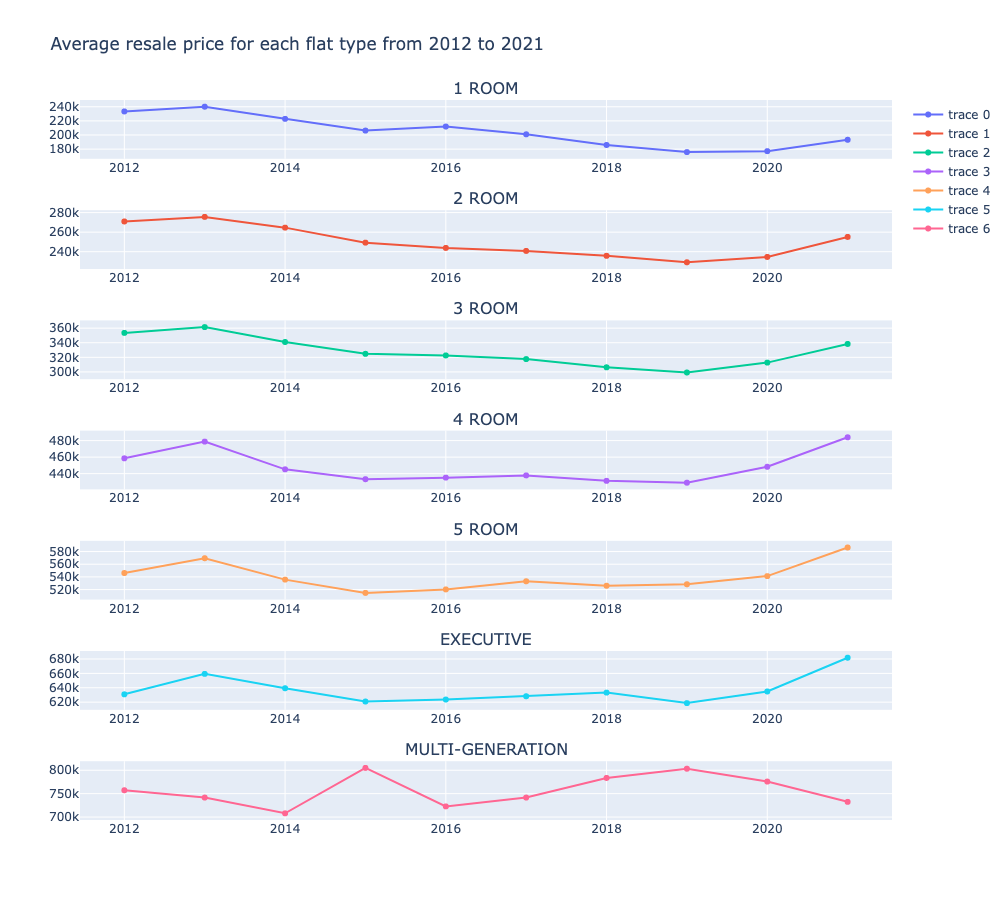

In [13]:
# Plot the graph to show the average resale price for each flat type
fig = make_subplots(rows=7, cols=1, subplot_titles=('1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'))

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_1rm,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_2rm,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_3rm,
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_4rm,
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_5rm,
), row=5, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_exec,
), row=6, col=1)

fig.append_trace(go.Scatter(
    x=list(range(2012,2022)),
    y=price_mean_mg,
), row=7, col=1)

fig.update_layout(height=900, width=800, title_text="Average resale price for each flat type from 2012 to 2021")
fig.show()

In [14]:
# Find percentage increase in resale prices across different flat types from 2019 to 2021
one_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='1 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='1 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='1 ROOM')].resale_price.mean()) * 100
two_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='2 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='2 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='2 ROOM')].resale_price.mean()) * 100
three_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='3 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='3 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='3 ROOM')].resale_price.mean()) * 100
four_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='4 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='4 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='4 ROOM')].resale_price.mean()) * 100
five_room_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='5 ROOM')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='5 ROOM')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='5 ROOM')].resale_price.mean()) * 100
exec_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='EXECUTIVE')].resale_price.mean()) * 100
mg_perc = ((housing[(housing['tranc_year']==2021) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['flat_type']=='MULTI-GENERATION')].resale_price.mean()) * 100

In [15]:
print(f"1-room: {one_room_perc}%")
print(f"2-room: {two_room_perc}%")
print(f"3-room: {three_room_perc}%")
print(f"4-room: {four_room_perc}%")
print(f"5-room: {five_room_perc}%")
print(f"Executive: {exec_perc}%")
print(f"Multi-generation: {mg_perc}%")

1-room: 9.921328118877454%
2-room: 11.322592451455616%
3-room: 13.08522374516743%
4-room: 12.821732747855021%
5-room: 10.978473776057559%
Executive: 10.203018528652368%
Multi-generation: -8.815308571485474%


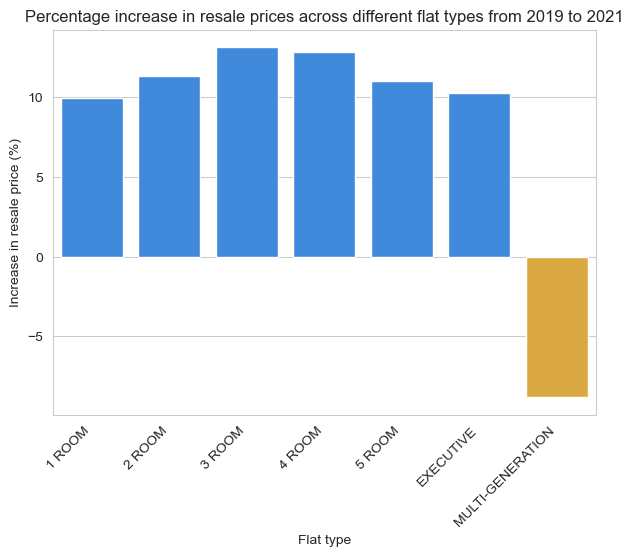

In [16]:
# Plot the graph to show the percentage increase across different flat types
fig = plt.figure(figsize =(7, 5))
sns.set_style('whitegrid')
x = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
y = [one_room_perc, two_room_perc, three_room_perc, four_room_perc, five_room_perc, exec_perc, mg_perc]

sns.barplot(x=x, y=y, palette = [(39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (39/255, 136/255, 245/255, 0.8), (245/255, 178/255, 39/255, 0.65)])
plt.title('Percentage increase in resale prices across different flat types from 2019 to 2021')
plt.xlabel('Flat type')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

- Resale prices have seen a downward trend across most flat types from 2013 to 2019, with the exception of multi-generation flat type.
- This fall in resale prices is due to the [reduction of the Mortgage Servicing Ratio (MSR)](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/) introduced in 2013 and the increase in BTO supply.
- From 2019 to 2021, most of the resale prices have bounced back up across most flat types, with the exception of multi-generation flat type. The percentage increase is led by 3-room flats at 13.1%, followed by 4-room flats at 12.8% and 2-room flats at 11.3%.
- This rise in resale prices coincides with the start of Covid-19 in which most of the construction and completion of Build-to-Order (BTO) flats was delayed due to government restrictions, causing a fall in supply of new-builds and new homeowners having to turn to the resale market. 
- There were only 56 multi-generation flats transacted over the 10 years of analysis in the dataset. According to [99.co](https://www.99.co/singapore/insider/is-buying-a-multigenerational-hdb-flat-a-good-idea/), there are many factors involved in getting such a flat so the model might not be able to predict the price of such flats well.

Since the lasso model places great importance on the planning areas in determining resale prices, we will investigate the trend of the resale prices based on the planning area the flats are in.

In [17]:
# Find the number of flats in the different planning areas
housing['planning_area'].value_counts()

Jurong West                11451
Woodlands                  11334
Sengkang                   11069
Tampines                   10506
Yishun                     10042
Bedok                       9062
Punggol                     7793
Hougang                     7557
Ang Mo Kio                  6908
Choa Chu Kang               6328
Bukit Merah                 5854
Bukit Batok                 5700
Bukit Panjang               5686
Toa Payoh                   4817
Pasir Ris                   4725
Queenstown                  4103
Geylang                     3986
Sembawang                   3723
Clementi                    3633
Jurong East                 3470
Kallang                     3163
Serangoon                   3121
Bishan                      2871
Novena                      1091
Marine Parade                943
Outram                       759
Rochor                       468
Bukit Timah                  362
Changi                        38
Downtown Core                 31
Tanglin   

We can see that there are more transactions in the heartland areas instead of central Singapore, thus prospective investors can be recommended heartland areas so that there will be a demand when they would like to resell for a profit. We will investigate on planning areas with at least 1000 transactions.

In [18]:
# Find the mean house price in each planning area across the years
price_mean_jurongwest = []
for i in list(range(2012,2022)):
    price_mean_jurongwest.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Jurong West')].resale_price.mean())

price_mean_woodlands = []
for i in list(range(2012,2022)):
    price_mean_woodlands.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Woodlands')].resale_price.mean())

price_mean_sengkang = []
for i in list(range(2012,2022)):
    price_mean_sengkang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Sengkang')].resale_price.mean())

price_mean_tampines = []
for i in list(range(2012,2022)):
    price_mean_tampines.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Tampines')].resale_price.mean())

price_mean_yishun = []
for i in list(range(2012,2022)):
    price_mean_yishun.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Yishun')].resale_price.mean())

price_mean_bedok = []
for i in list(range(2012,2022)):
    price_mean_bedok.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bedok')].resale_price.mean())

price_mean_punggol = []
for i in list(range(2012,2022)):
    price_mean_punggol.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Punggol')].resale_price.mean())

price_mean_hougang = []
for i in list(range(2012,2022)):
    price_mean_hougang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Hougang')].resale_price.mean())

price_mean_amk = []
for i in list(range(2012,2022)):
    price_mean_amk.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())

price_mean_cck = []
for i in list(range(2012,2022)):
    price_mean_cck.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())

price_mean_bukitmerah = []
for i in list(range(2012,2022)):
    price_mean_bukitmerah.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())

price_mean_bukitbatok = []
for i in list(range(2012,2022)):
    price_mean_bukitbatok.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())

price_mean_bukitpanjang = []
for i in list(range(2012,2022)):
    price_mean_bukitpanjang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())

price_mean_tpy = []
for i in list(range(2012,2022)):
    price_mean_tpy.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())

price_mean_pasirris = []
for i in list(range(2012,2022)):
    price_mean_pasirris.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())

price_mean_queenstown = []
for i in list(range(2012,2022)):
    price_mean_queenstown.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Queenstown')].resale_price.mean())

price_mean_geylang = []
for i in list(range(2012,2022)):
    price_mean_geylang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Geylang')].resale_price.mean())

price_mean_sembawang = []
for i in list(range(2012,2022)):
    price_mean_sembawang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Sembawang')].resale_price.mean())

price_mean_clementi = []
for i in list(range(2012,2022)):
    price_mean_clementi.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Clementi')].resale_price.mean())

price_mean_jurongeast = []
for i in list(range(2012,2022)):
    price_mean_jurongeast.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Jurong East')].resale_price.mean())

price_mean_kallang = []
for i in list(range(2012,2022)):
    price_mean_kallang.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Kallang')].resale_price.mean())

price_mean_serangoon = []
for i in list(range(2012,2022)):
    price_mean_serangoon.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Serangoon')].resale_price.mean())

price_mean_bishan = []
for i in list(range(2012,2022)):
    price_mean_bishan.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Bishan')].resale_price.mean())

price_mean_novena = []
for i in list(range(2012,2022)):
    price_mean_novena.append(housing[(housing['tranc_year']==i) & (housing['planning_area']=='Novena')].resale_price.mean())

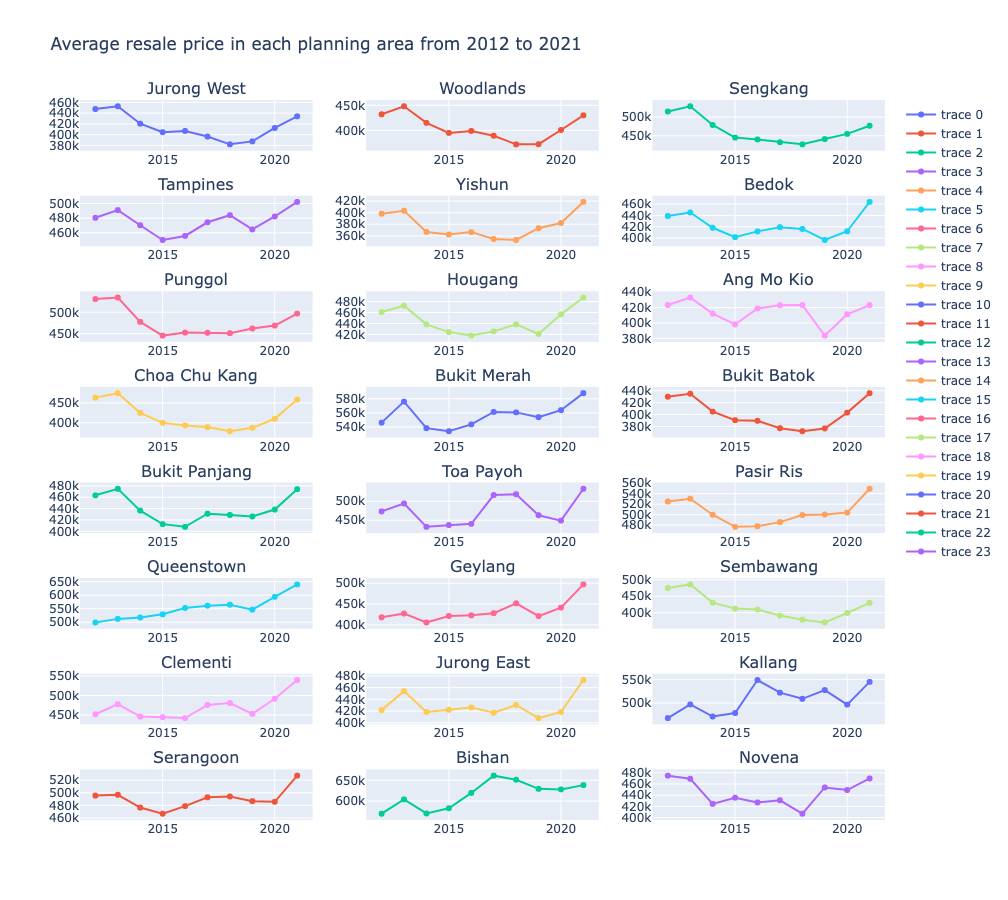

In [19]:
# Plot the graph to show the average resale price in each planning area
fig = make_subplots(rows=8, cols=3, subplot_titles=('Jurong West', 'Woodlands', 'Sengkang', 'Tampines', 'Yishun', 'Bedok', 'Punggol', 'Hougang', 'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Merah', 'Bukit Batok', 'Bukit Panjang', 'Toa Payoh', 'Pasir Ris', 'Queenstown', 'Geylang', 'Sembawang', 'Clementi', 'Jurong East', 'Kallang', 'Serangoon', 'Bishan', 'Novena'))

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_jurongwest),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_woodlands),
              row=1, col=2)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_sengkang),
              row=1, col=3)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_tampines),
              row=2, col=1)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_yishun),
              row=2, col=2)

fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bedok),
              row=2, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_punggol),
              row=3, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_hougang),
              row=3, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_amk),
              row=3, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_cck),
              row=4, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitmerah),
              row=4, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitbatok),
              row=4, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bukitpanjang),
              row=5, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_tpy),
              row=5, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_pasirris),
              row=5, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_queenstown),
              row=6, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_geylang),
              row=6, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_sembawang),
              row=6, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_clementi),
              row=7, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_jurongeast),
              row=7, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_kallang),
              row=7, col=3)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_serangoon),
              row=8, col=1)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_bishan),
              row=8, col=2)
              
fig.add_trace(go.Scatter(x=list(range(2012,2022)), y=price_mean_novena),
              row=8, col=3)

fig.update_layout(height=900, width=1000, title_text="Average resale price in each planning area from 2012 to 2021")
fig.show()

Most planning areas see an increase in resale prices from 2019 to 2021 as well.

In [20]:
# Find percentage increase in resale price across different planning areas from 2019 to 2021
jurongwest_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Jurong West')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong West')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong West')].resale_price.mean()) * 100
woodlands_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Woodlands')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Woodlands')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Woodlands')].resale_price.mean()) * 100
sengkang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Sengkang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sengkang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sengkang')].resale_price.mean()) * 100
tampines_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Tampines')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Tampines')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Tampines')].resale_price.mean()) * 100
yishun_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Yishun')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Yishun')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Yishun')].resale_price.mean()) * 100
bedok_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bedok')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bedok')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bedok')].resale_price.mean()) * 100
punggol_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Punggol')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Punggol')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Punggol')].resale_price.mean()) * 100
hougang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Hougang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Hougang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Hougang')].resale_price.mean()) * 100
amk_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Ang Mo Kio')].resale_price.mean()) * 100
cck_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Choa Chu Kang')].resale_price.mean()) * 100
bukitmerah_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Merah')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Merah')].resale_price.mean()) * 100
bukitbatok_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Batok')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Batok')].resale_price.mean()) * 100
bukitpanjang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bukit Panjang')].resale_price.mean()) * 100
tpy_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Toa Payoh')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Toa Payoh')].resale_price.mean()) * 100
pasirris_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Pasir Ris')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Pasir Ris')].resale_price.mean()) * 100
queenstown_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Queenstown')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Queenstown')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Queenstown')].resale_price.mean()) * 100
geylang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Geylang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Geylang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Geylang')].resale_price.mean()) * 100
sembawang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Sembawang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sembawang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Sembawang')].resale_price.mean()) * 100
clementi_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Clementi')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Clementi')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Clementi')].resale_price.mean()) * 100
jurongeast_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Jurong East')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong East')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Jurong East')].resale_price.mean()) * 100
kallang_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Kallang')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Kallang')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Kallang')].resale_price.mean()) * 100
serangoon_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Serangoon')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Serangoon')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Serangoon')].resale_price.mean()) * 100
bishan_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Bishan')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bishan')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Bishan')].resale_price.mean()) * 100
novena_perc = ((housing[(housing['tranc_year']==2021) & (housing['planning_area']=='Novena')].resale_price.mean())-(housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Novena')].resale_price.mean())) / (housing[(housing['tranc_year']==2019) & (housing['planning_area']=='Novena')].resale_price.mean()) * 100

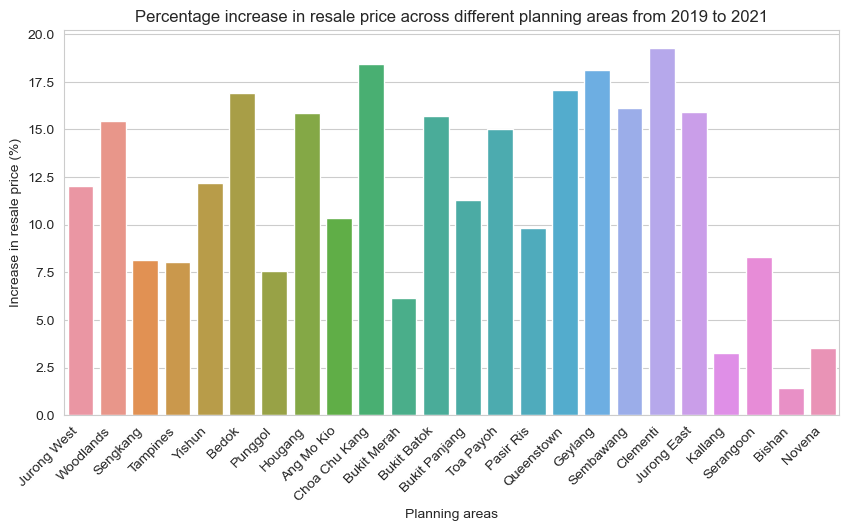

In [21]:
# Plot the graph to show percentage increase in resale price across different planning areas
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x = ['Jurong West', 'Woodlands', 'Sengkang', 'Tampines', 'Yishun', 'Bedok', 'Punggol', 'Hougang', 'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Merah', 'Bukit Batok', 'Bukit Panjang', 'Toa Payoh', 'Pasir Ris', 'Queenstown', 'Geylang', 'Sembawang', 'Clementi', 'Jurong East', 'Kallang', 'Serangoon', 'Bishan', 'Novena']
y = [jurongwest_perc, woodlands_perc, sengkang_perc, tampines_perc, yishun_perc, bedok_perc, punggol_perc, hougang_perc, amk_perc, cck_perc, bukitmerah_perc, bukitbatok_perc, bukitpanjang_perc, tpy_perc, pasirris_perc, queenstown_perc, geylang_perc, sembawang_perc, clementi_perc, jurongeast_perc, kallang_perc, serangoon_perc, bishan_perc, novena_perc]

sns.barplot(x=x, y=y)
plt.title('Percentage increase in resale price across different planning areas from 2019 to 2021')
plt.xlabel('Planning areas')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

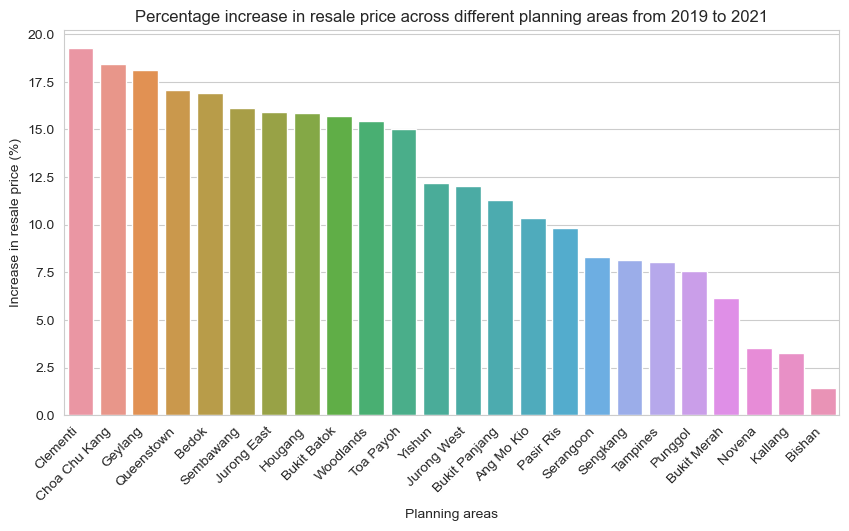

In [22]:
# Rearranging the bars in descending order
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x = ['Clementi', 'Choa Chu Kang', 'Geylang', 'Queenstown', 'Bedok', 'Sembawang', 'Jurong East', 'Hougang', 'Bukit Batok', 'Woodlands', 'Toa Payoh', 'Yishun', 'Jurong West', 'Bukit Panjang', 'Ang Mo Kio', 'Pasir Ris', 'Serangoon', 'Sengkang', 'Tampines', 'Punggol', 'Bukit Merah', 'Novena', 'Kallang', 'Bishan']
y = [clementi_perc, cck_perc, geylang_perc, queenstown_perc, bedok_perc, sembawang_perc, jurongeast_perc, hougang_perc, bukitbatok_perc, woodlands_perc, tpy_perc, yishun_perc, jurongwest_perc, bukitpanjang_perc, amk_perc, pasirris_perc, serangoon_perc, sengkang_perc, tampines_perc, punggol_perc, bukitmerah_perc, novena_perc, kallang_perc, bishan_perc]

sns.barplot(x=x, y=y)
plt.title('Percentage increase in resale price across different planning areas from 2019 to 2021')
plt.xlabel('Planning areas')
plt.xticks(rotation = 45, ha="right") 
plt.ylabel('Increase in resale price (%)');

In [23]:
# Find planning areas with at least 15% increase in resale price
print(f"Clement: {clementi_perc}%")
print(f"Choa Chu Kang: {cck_perc}%")
print(f"Geylang: {geylang_perc}%")
print(f"Queenstown: {queenstown_perc}%")
print(f"Bedok: {bedok_perc}%")
print(f"Sembawang: {sembawang_perc}%")
print(f"Jurong East: {jurongeast_perc}%")
print(f"Hougang: {hougang_perc}%")
print(f"Bukit Batok: {bukitbatok_perc}%")
print(f"Woodlands: {woodlands_perc}%")
print(f"Toa Payoh: {tpy_perc}%")

Clement: 19.250441704234568%
Choa Chu Kang: 18.419439258416283%
Geylang: 18.117996146304304%
Queenstown: 17.060456769193273%
Bedok: 16.90792532442126%
Sembawang: 16.11905509167212%
Jurong East: 15.91045200675086%
Hougang: 15.885747659870187%
Bukit Batok: 15.712860087256411%
Woodlands: 15.462618098716433%
Toa Payoh: 15.042036762780386%


In [24]:
print(f"Kallang: {kallang_perc}%")

Kallang: 3.2601992405368785%


- From 2019 to 2021, the planning areas with at least 15% increase in the resale price are in Clementi (19.3%), followed by Choa Chu Kang (18.4%), Geylang (18.1%), Queenstown (17.1%), Bedok (16.9%), Sembawang (16.1%), Jurong East (15.9%), Hougang (15.9%), Bukit Batok (15.7%), Woodlands (15.5%), and Toa Payoh (15.0%). Thus prospective investors can be recommended these high-growth areas.
- However, more research has to be done to find out the reasons for the increase in resale prices in these areas (e.g. new development) and if there are any more upcoming development plans as the resale prices might plateau or have peaked.
> For example, although Kallang has only seen an increase of 3.3% in the resale price form 2019 to 2021, there are plans to [transform the existing Kallang Industrial Estate](https://www.ura.gov.sg/Corporate/Planning/Master-Plan/Urban-Transformations/Kallang-River) in the longer term into an attractive mixed-use precinct along the waterfront. There is also a vision for Kampong Bugis (a stone's throw away from Kallang) to become an attractive residential and recreational precinct that supports active mobility, environmental sustainability, and fosters community interaction.

## Conclusions and Recommendations

- We have decided to use a RidgeCV model for this task.
- Our model is able to predict the resale price of the public housing of Singapore with an $R^2$ score of 0.914 on the train dataset and 0.912 on the test dataset.
- With our model, a prospective investor can be recommended a flat which is undervalued on the market based on the model prediction. For instance, if the flat is listed at \\$300,000 but our model predicts that it can be sold for \\$350,000, such a flat will be recommended so that the investor will make a profit.
---
- The resale price is highly correlated to the floor area of the flat, measured in square metres.
- As such, we have investigated the trend of the resale price based on the flat types which generally correspond to the floor area.
- Resale prices have seen a downward trend across most flat types from 2013 to 2019, with the exception of multi-generation flat type.
- This fall in resale prices is due to the [reduction of the Mortgage Servicing Ratio (MSR)](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/) introduced in 2013 and the increase in BTO supply.
- From 2019 to 2021, most of the resale prices have bounced back up across most flat types, with the exception of multi-generation flat type. The percentage increase is led by 3-room flats at 13.1%, followed by 4-room flats at 12.8% and 2-room flats at 11.3%. This shows the bullish demand for such flat types and hence can prove profitable for prospective investors.
- This rise in resale prices coincides with the start of Covid-19 in which most of the construction and completion of Build-to-Order (BTO) flats was delayed due to government restrictions, causing a fall in supply of new-builds and new homeowners having to turn to the resale market. 
---
- Most planning areas see an increase in resale prices from 2019 to 2021 as well.
- From 2019 to 2021, the planning areas with at least 15% increase in the resale price are in Clementi (19.3%), followed by Choa Chu Kang (18.4%), Geylang (18.1%), Queenstown (17.1%), Bedok (16.9%), Sembawang (16.1%), Jurong East (15.9%), Hougang (15.9%), Bukit Batok (15.7%), Woodlands (15.5%), and Toa Payoh (15.0%). Thus, prospective investors can be recommended these high-growth areas.

## Limitations

- There were only a limited 56 multi-generation flats and 81 1-room flats transacted over the 10 years of analysis in the dataset. In addition, according to [99.co](https://www.99.co/singapore/insider/is-buying-a-multigenerational-hdb-flat-a-good-idea/), there are many factors involved in getting multi-generation flats yet are not captured in the dataset so the model might not be able to predict the price of such flats well.
- More research has to be done to find out the reasons for the increase in resale prices in the high-growth areas (e.g. new development) and if there are any more upcoming development plans as the resale prices might plateau or have peaked.
> For example, although Kallang has only seen an increase of 3.3% in the resale price form 2019 to 2021, there are plans to [transform the existing Kallang Industrial Estate](https://www.ura.gov.sg/Corporate/Planning/Master-Plan/Urban-Transformations/Kallang-River) in the longer term into an attractive mixed-use precinct along the waterfront. There is also a vision for Kampong Bugis (a stone's throw away from Kallang) to become an attractive residential and recreational precinct that supports active mobility, environmental sustainability, and fosters community interaction.
- September 2022 saw another set of cooling measures rolled out by the Singapore government to curb house prices thus our model might not be able to extrapolate on future resale prices well.